# Numpy Financial Functions Usage(FV, PV, Portfolio Profile, VAR)

In [239]:
import numpy_financial as npf

In [240]:
deposit = 5000
annul_int = 0.05
years = 5

future_value = npf.fv(annul_int, years, 0, -deposit)
print(f'Future value of $5,000 deposit at 5% interest rate after 5 years : ${future_value:.2f}')

Future value of $5,000 deposit at 5% interest rate after 5 years : $6381.41


In [241]:
present_valeu = npf.pv(annul_int, years - 1, 0, -future_value)
print(f'Present value at 4th year: ${present_valeu:.2f}')

Present value at 4th year: $5250.00


In [242]:
investment = 10000
cash_flows_case_1 = [-investment, 25000, 25000, 25000, 25000, 25000]
cash_flows_case_2 = [-investment, 5000, 10000, 40000, 40000, 40000]
cash_flows_case_3 = [-investment, 50000, 40000, 0, 10000, 25000]

net_present_value_case_1 = npf.npv(annul_int, cash_flows_case_1)
net_present_value_case_2 = npf.npv(annul_int, cash_flows_case_2)
net_present_value_case_3 = npf.npv(annul_int, cash_flows_case_3)

print(
    f'if we invest $10,000 and can get {cash_flows_case_1[1:]} annual income, NPV will be : ${net_present_value_case_1:.2f}')
print(
    f'if we invest $10,000 and can get {cash_flows_case_2[1:]} annual income, NPV will be : ${net_present_value_case_2:.2f}')
print(
    f'if we invest $10,000 and can get {cash_flows_case_3[1:]} annual income, NPV will be : ${net_present_value_case_3:.2f}')

if we invest $10,000 and can get [25000, 25000, 25000, 25000, 25000] annual income, NPV will be : $98236.92
if we invest $10,000 and can get [5000, 10000, 40000, 40000, 40000] annual income, NPV will be : $102634.85
if we invest $10,000 and can get [50000, 40000, 0, 10000, 25000] annual income, NPV will be : $101715.41


In [243]:
discount_rates = [0.0, 0.025, 0.05, 0.075, 0.1]

npv_project_case_1 = []
npv_project_case_2 = []
npv_project_case_3 = []

for rate in discount_rates:
    npv_one = npf.npv(rate, cash_flows_case_1)
    npv_two = npf.npv(rate, cash_flows_case_2)
    npv_three = npf.npv(rate, cash_flows_case_3)
    npv_project_case_1.append(npv_one)
    npv_project_case_2.append(npv_two)
    npv_project_case_3.append(npv_three)

In [244]:
npv_project_case_1

[115000.0,
 106145.71239048312,
 98236.91676577048,
 91147.12254996132,
 84769.66923521119]

In [245]:
import matplotlib.pyplot as plt
from shapely.geometry import LineString

Text(0, 0.5, 'Net Present Value')

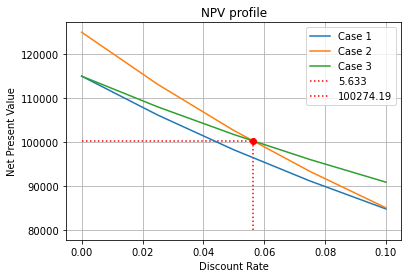

In [246]:
plt.plot(discount_rates, npv_project_case_1, label='Case 1')
plt.plot(discount_rates, npv_project_case_2, label='Case 2')
plt.plot(discount_rates, npv_project_case_3, label='Case 3')

line1 = LineString(list(zip(discount_rates, npv_project_case_1)))
line2 = LineString(list(zip(discount_rates, npv_project_case_2)))
line3 = LineString(list(zip(discount_rates, npv_project_case_3)))

point = line2.intersection(line3)

plt.plot(point.x, point.y, marker="o", color="red")

plt.hlines(y=point.y, xmin=0.0, xmax=point.x, color='red', linestyles='dotted', label=str(round(point.x * 100, 3)))
plt.vlines(x=point.x, ymin=80000, ymax=point.y, color='red', linestyles='dotted', label=str(round(point.y, 2)))

plt.grid()
plt.legend()
plt.title('NPV profile')
plt.xlabel('Discount Rate')
plt.ylabel('Net Present Value')

In [247]:
import numpy as np
import pandas as pd
import FinanceDataReader as fdr

pf = ['MSFT', 'AAPL', 'TSLA']

prices = pd.DataFrame()

for stock in pf:
    prices[stock] = fdr.DataReader(stock, '2012-03-01', '2022-03-01')['Adj Close']

prices.tail()

,MSFT,AAPL,TSLA
Date,,,
2022-02-22,284.924805,163.330597,273.843323
2022-02-23,277.547180,159.106201,254.679993
2022-02-24,291.728027,161.760101,266.923340
2022-02-25,294.421631,163.857407,269.956665
2022-02-28,295.887268,164.125763,290.143341


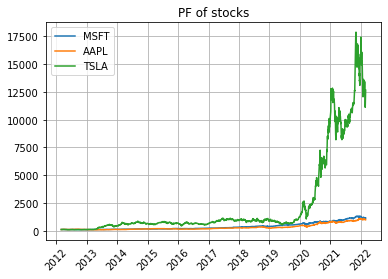

In [248]:
first_date = prices.iloc[0]
normalized_prices = prices / first_date * 100
index = prices.index

line1, line2, line3 = plt.plot(normalized_prices, label=['MSFT', 'AAPL', 'IBM'])
plt.legend(loc='lower right')
plt.xticks(rotation=45)
plt.title('PF of stocks')
plt.grid()
plt.legend([line1, line2, line3], ['MSFT', 'AAPL', 'TSLA'], loc='best')

In [249]:
stock_return = np.log(prices / prices.shift(1))
stock_return

,MSFT,AAPL,TSLA
Date,,,
2012-03-01,NaN,NaN,NaN
2012-03-02,-0.006525,0.001304,-0.010811
2012-03-05,-0.008767,-0.022295,-0.007963
2012-03-06,-0.007575,-0.005454,-0.019737
2012-03-07,0.008833,0.000811,0.000302
...,...,...,...
2022-02-22,-0.000730,-0.017973,-0.042246
2022-02-23,-0.026234,-0.026204,-0.072548
2022-02-24,0.049831,0.016542,0.046954


In [250]:
stock_return = prices.pct_change(1)
stock_return

,MSFT,AAPL,TSLA
Date,,,
2012-03-01,NaN,NaN,NaN
2012-03-02,-0.006503,0.001304,-0.010753
2012-03-05,-0.008728,-0.022048,-0.007932
2012-03-06,-0.007547,-0.005439,-0.019544
2012-03-07,0.008872,0.000811,0.000302
...,...,...,...
2022-02-22,-0.000729,-0.017812,-0.041366
2022-02-23,-0.025893,-0.025864,-0.069979
2022-02-24,0.051093,0.016680,0.048073


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CC1B54C790>,
      dtype=object)

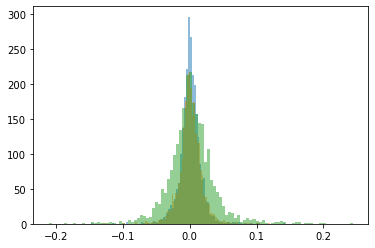

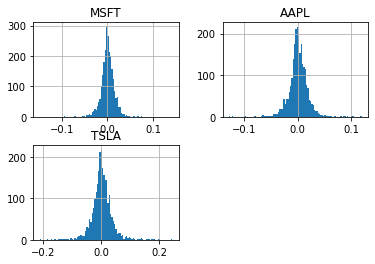

In [251]:
stock_return.dropna(inplace=True)

plt.hist(stock_return['MSFT'], alpha=0.5, bins=100)
plt.hist(stock_return['AAPL'], alpha=0.5, bins=100)
plt.hist(stock_return['TSLA'], alpha=0.5, bins=100)
stock_return.hist(bins=100)

In [252]:
mean_return = stock_return.mean()  # same with this: stock_return.describe().loc['mean']
mean_return

MSFT    0.001098
AAPL    0.001073
TSLA    0.002539
dtype: float64

In [253]:
stock_cov = stock_return.cov()
stock_cov

,MSFT,AAPL,TSLA
MSFT,0.000261,0.000165,0.000197
AAPL,0.000165,0.000321,0.000207
TSLA,0.000197,0.000207,0.001236


In [254]:
pf_weights = np.array([0.25, 0.25, 0.5])
pf_mean = mean_return.dot(pf_weights)

# variance = pf_weights.T.dot(stock_cov)
# standard deviation = np.sqrt(variance)
volatility = np.sqrt(pf_weights.T.dot(stock_cov).dot(pf_weights))

pf_value = 100000
invst_mean = (1 + pf_mean) * pf_value
invst_volatility = pf_value * volatility

pf_mean, invst_mean, volatility, invst_volatility

(0.001812384202320688,
 100181.23842023208,
 0.02160908675388139,
 2160.9086753881393)

In [255]:
import scipy.stats as sts

confidence1 = 95
confidence2 = 99
# ppf() : percent point function, use default values for mean=0, standard deviation=1 as std for a normal bell distribution
normsinv1 = sts.norm.ppf((1 - confidence1 / 100), invst_mean, invst_volatility)
normsinv2 = sts.norm.ppf((1 - confidence2 / 100), invst_mean, invst_volatility)
var1 = pf_value - normsinv1
var2 = pf_value - normsinv2
var1, var2

(3373.140051990995, 4845.786882753528)

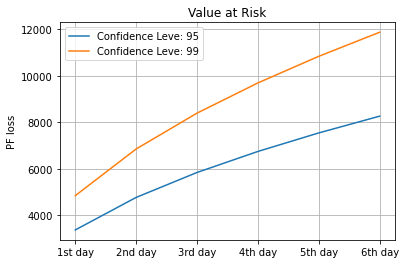

In [256]:
var_results1 = []
var_results2 = []
number_of_days = 7
days_list = list(range(1, number_of_days))

for day in days_list:
    result = var1 * np.sqrt(day)
    var_results1.append(result)
    result = var2 * np.sqrt(day)
    var_results2.append(result)

plt.plot(days_list, var_results1)
plt.plot(days_list, var_results2)
plt.title("Value at Risk")
plt.ylabel("PF loss")
plt.xticks(days_list, ["1st day", "2nd day", "3rd day", "4th day", "5th day", "6th day"]);
plt.grid()
plt.legend(['Confidence Leve: ' + str(confidence1), 'Confidence Leve: ' + str(confidence2)], loc='best')